<a href="https://colab.research.google.com/github/pedro-de-bastos/CS166-Modeling-Simulation-and-Decision-Making/blob/main/Simulating_the_Gambler's_Ruin%209.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulating the Gambler's Ruin

In [25]:
import numpy as np

test = np.random.random()>0.6
if test == True:
  print('tails')
else:
  print('heads')

heads


In [102]:
def gamblers_ruin_1(turns, bet_amount, start_sum):
  coin_tosses = np.random.choice(['heads', 'tails'], p=[0.6, 0.4], size=(turns))
  coin_choices = np.random.choice(['heads', 'tails'], p=[0.6, 0.4], size=(turns))
  results = coin_tosses==coin_choices

  return start_sum + np.sum(results)*bet_amount - (turns  - np.sum(results))*bet_amount

def gamblers_ruin_2(turns, budget):
  coin_tosses = np.random.choice(['heads', 'tails'], p=[0.6, 0.4], size=(turns))
  
  for i in coin_tosses:
    if i == 'heads':
      budget += budget*0.5
    else:
      budget -= budget*0.5

  return budget

def gamblers_ruin_3(turns, budget):
  coin_tosses = np.random.choice(['heads', 'tails'], p=[0.6, 0.4], size=(turns))
  
  head_counter = 0
  for i in coin_tosses:
    head_counter +=1
    if head_counter < turns*0.6:
      if i == 'heads':
        budget += budget*0.5
      else:
        budget -= budget*0.5
    else:
      if i == 'heads':
        budget -= budget*0.5
      else:
        budget += budget*0.5

  return budget


sims_1 = [gamblers_ruin_1(20, 12.5, 250) for i in range(1000)]
sims_2 = [gamblers_ruin_2(20, 250) for i in range(1000)]
sims_3 = [gamblers_ruin_3(20, 250) for i in range(1000)]

Your mean outcome was 261.125.
Your 95% conf int was [150. 375.].


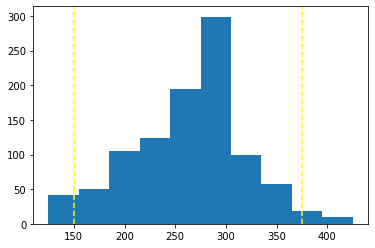

In [84]:
import matplotlib.pyplot as plt
plt.hist(sims_1)

intervals = np.quantile(sims_1, q=(0.025, 0.975))

plt.axvline(x=intervals[0], ls="--", color = "yellow")
plt.axvline(x=intervals[1], ls="--", color="yellow")
print(f"Your mean outcome was {np.mean(sims_1)}.")
print(f"Your 95% conf int was {intervals}.")

Your mean outcome was 1939.0783610343933.
Your median outcome was 126.70540809631348.
Your 95% conf int was [5.21421432e-01 1.02631381e+04].


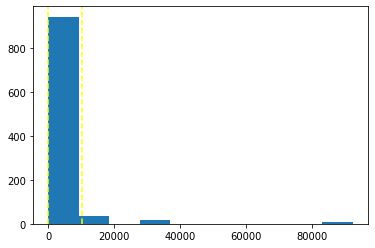

In [103]:
plt.hist(sims_2)
intervals = np.quantile(sims_2, q=(0.025, 0.975))

plt.axvline(x=intervals[0], ls="--", color = "yellow")
plt.axvline(x=intervals[1], ls="--", color="yellow")
print(f"Your mean outcome was {np.mean(sims_2)}.")
print(f"Your median outcome was {np.median(sims_2)}.")
print(f"Your 95% conf int was {intervals}.")

Your mean outcome was 263.7008171081543.
Your 95% conf int was [1.73807144e-01 1.14034867e+03].


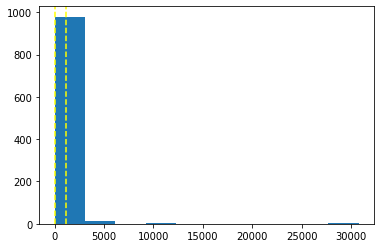

In [97]:
plt.hist(sims_3)
intervals = np.quantile(sims_3, q=(0.025, 0.975))

plt.axvline(x=intervals[0], ls="--", color = "yellow")
plt.axvline(x=intervals[1], ls="--", color="yellow")
print(f"Your mean outcome was {np.mean(sims_3)}.")
print(f"Your 95% conf int was {intervals}.")

In [92]:
2135.76/2

1067.88